In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datasets_180_408_data.csv to datasets_180_408_data.csv
User uploaded file "datasets_180_408_data.csv" with length 125204 bytes


In [2]:
uploaded
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['datasets_180_408_data.csv'].decode('utf-8')))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Benign 357
Malignanat 212


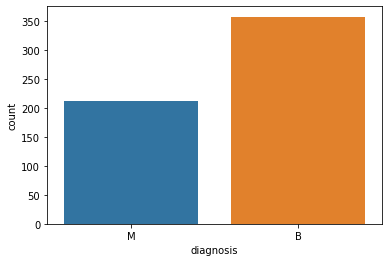

In [3]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Unnamed: 32']

In [5]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
from keras.layers import Dropout
#adding the input and first hidden layer
classifier1 = Sequential()
classifier1.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
classifier1.add(Dropout(p=1.0))

#adding the second hidden layer
classifier1.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier1.add(Dropout(p=1.0))

#adding the output layer
classifier1.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':


In [8]:
classifier1.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
classifier1.fit(X_train, y_train, batch_size=100, nb_epoch=150)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
455/455 [==============================] - 0s 709us/step - loss: 0.6925 - accuracy: 0.7055
Epoch 2/150
455/455 [==============================] - 0s 26us/step - loss: 0.6906 - accuracy: 0.8176
Epoch 3/150
455/455 [==============================] - 0s 25us/step - loss: 0.6878 - accuracy: 0.8659
Epoch 4/150
455/455 [==============================] - 0s 27us/step - loss: 0.6836 - accuracy: 0.9033
Epoch 5/150
455/455 [==============================] - 0s 27us/step - loss: 0.6772 - accuracy: 0.9187
Epoch 6/150
455/455 [==============================] - 0s 31us/step - loss: 0.6680 - accuracy: 0.9231
Epoch 7/150
455/455 [==============================] - 0s 24us/step - loss: 0.6555 - accuracy: 0.9363
Epoch 8/150
455/455 [==============================] - 0s 22us/step - loss: 0.6380 - accuracy: 0.9451
Epoch 9/150
455/455 [==============================] - 0s 23us/step - loss: 0.6151 - accuracy: 0.9451
Epoch 10/150
455/455 [==============================] - 0s 23us/step - loss: 0.58

In [10]:
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



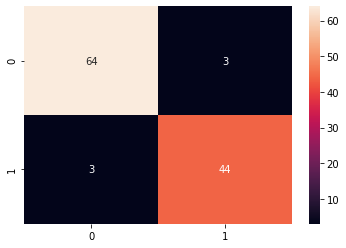

In [12]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)


In [ ]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [10, 20],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
409/409 [==============================] - 0s 527us/step - loss: 0.6805 - accuracy: 0.6235
Epoch 2/10
409/409 [==============================] - 0s 159us/step - loss: 0.5304 - accuracy: 0.7653
Epoch 3/10
409/409 [==============================] - 0s 165us/step - loss: 0.3286 - accuracy: 0.9535
Epoch 4/10
409/409 [==============================] - 0s 131us/step - loss: 0.2304 - accuracy: 0.9682
Epoch 5/10
409/409 [==============================] - 0s 128us/step - loss: 0.1586 - accuracy: 0.9756
Epoch 6/10
409/409 [==============================] - 0s 156us/step - loss: 0.1198 - accuracy: 0.9780
Epoch 7/10
409/409 [==============================] - 0s 129us/step - loss: 0.1001 - accuracy: 0.9756
Epoch 8/10
409/409 [==============================] - 0s 164us/step - loss: 0.0888 - accuracy: 0.9829
Epoch 9/10
409/409 [==============================] - 0s 174us/step - loss: 0.0827 - accuracy: 0.9829
Epoch 10/10
409/409 [==============================] - 0s 166us/step - loss: 0.076

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)

{'batch_size': 10, 'epochs': 20, 'optimizer': 'rmsprop'}
0.9846376811594203


In [ ]:
y_pred2=grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred2))

[[64  3]
 [ 3 44]]
